<a href="https://colab.research.google.com/github/pallavi17bhatt/E-waste-Analysis/blob/main/ewaste_global_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Total Waste Generated by country in Last 5 Years

# No.1 Country in E-waste Generation

By analysing the waste generated in thousand tonnes year wise we came to a conclusion that USA is at Number 1 followed by Japan, Russia, UK, and India.

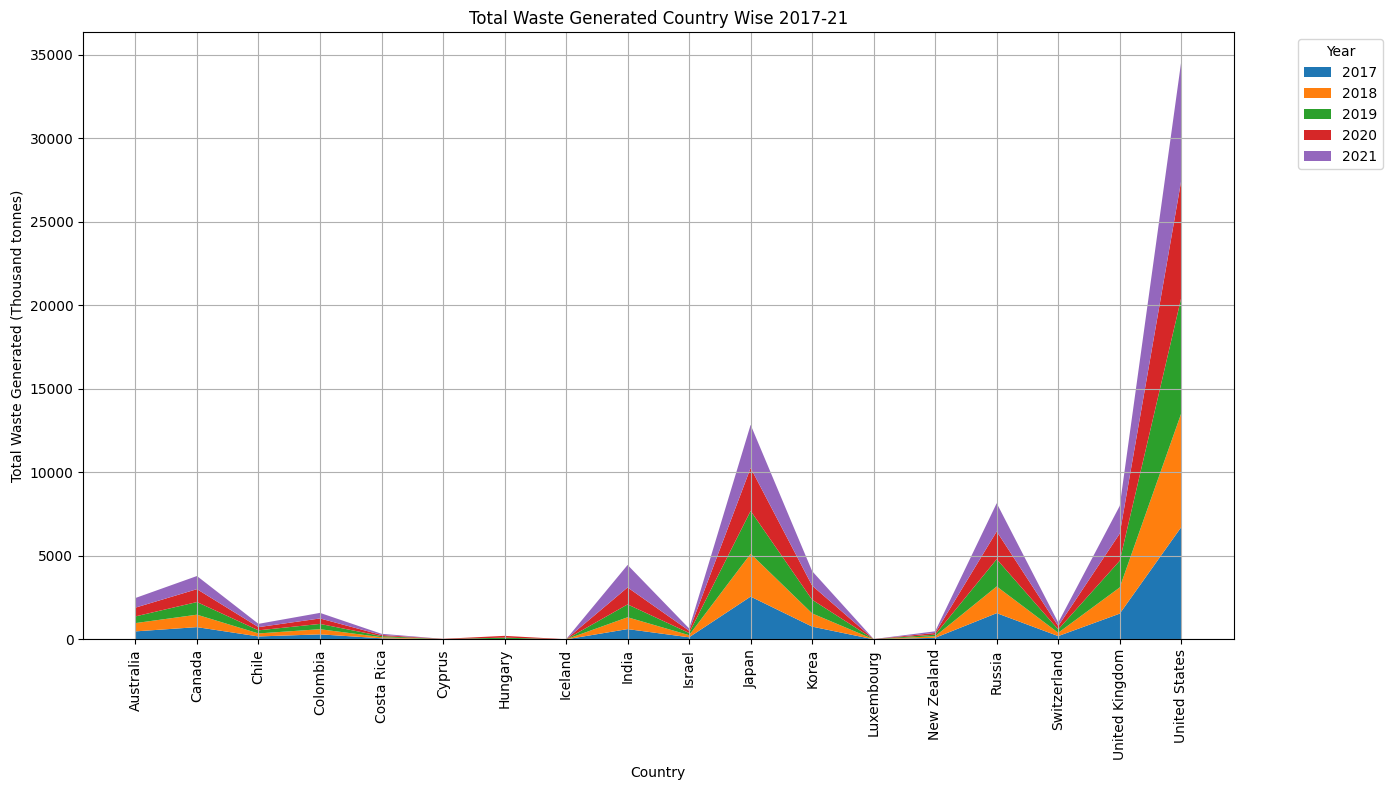

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/GlobalData.csv'  # Adjust this path as necessary
df = pd.read_csv(file_path)

# Filter the data for "Total waste" and "Waste generated"
filtered_df = df[
    (df['Waste category'] == 'Total waste') &
    (df['Waste management operations'] == 'Waste generated') &
    (df['Unit of measure'] == 'Thousand tonnes')
]

# Filter for the last 5 years
last_5_years = filtered_df['TIME_PERIOD'].max() - 4
filtered_df = filtered_df[filtered_df['TIME_PERIOD'] >= last_5_years]

# Group by Country and Year and sum the observation values
grouped_df = filtered_df.groupby(['TIME_PERIOD', 'Country'])['OBS_VALUE'].sum().reset_index()

# Pivot the dataframe to have countries as the index and years as the columns
pivot_df = grouped_df.pivot(index='Country', columns='TIME_PERIOD', values='OBS_VALUE').fillna(0)

# Create the stacked area plot
plt.figure(figsize=(14, 8))
plt.stackplot(pivot_df.index, pivot_df.T, labels=pivot_df.columns)
plt.title('Total Waste Generated Country Wise 2017-21')
plt.xlabel('Country')
plt.ylabel('Total Waste Generated (Thousand tonnes)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Analysis of Categorywise Total Waste Generated by country in Last 5 Years

# Category of E waste

In these below graphs we analysed waste genereted(in tons) in year 2017-21 category wise across top 3 countries which we figured out in above graph.

Here we conclude that in all the countries majority of waste generated falls under the category of small equipments

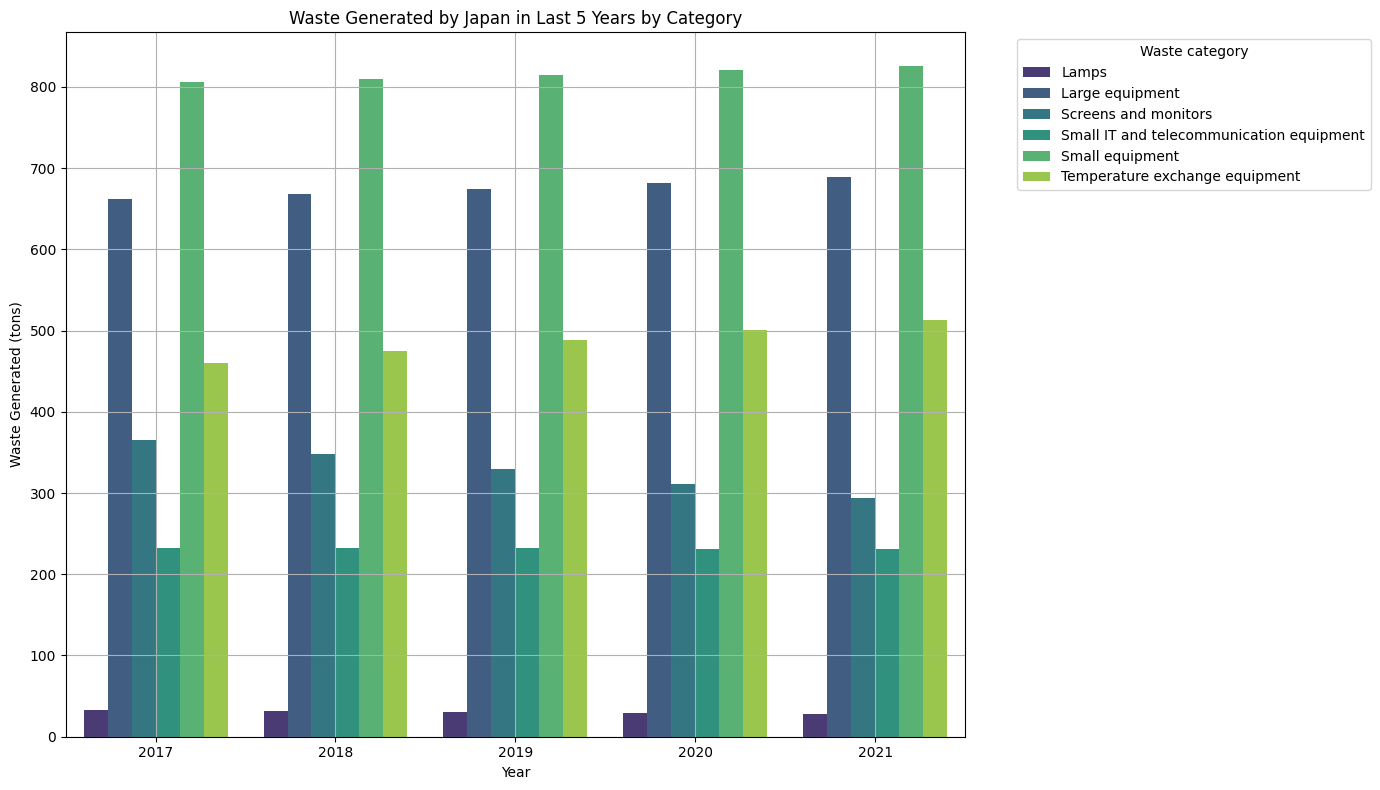

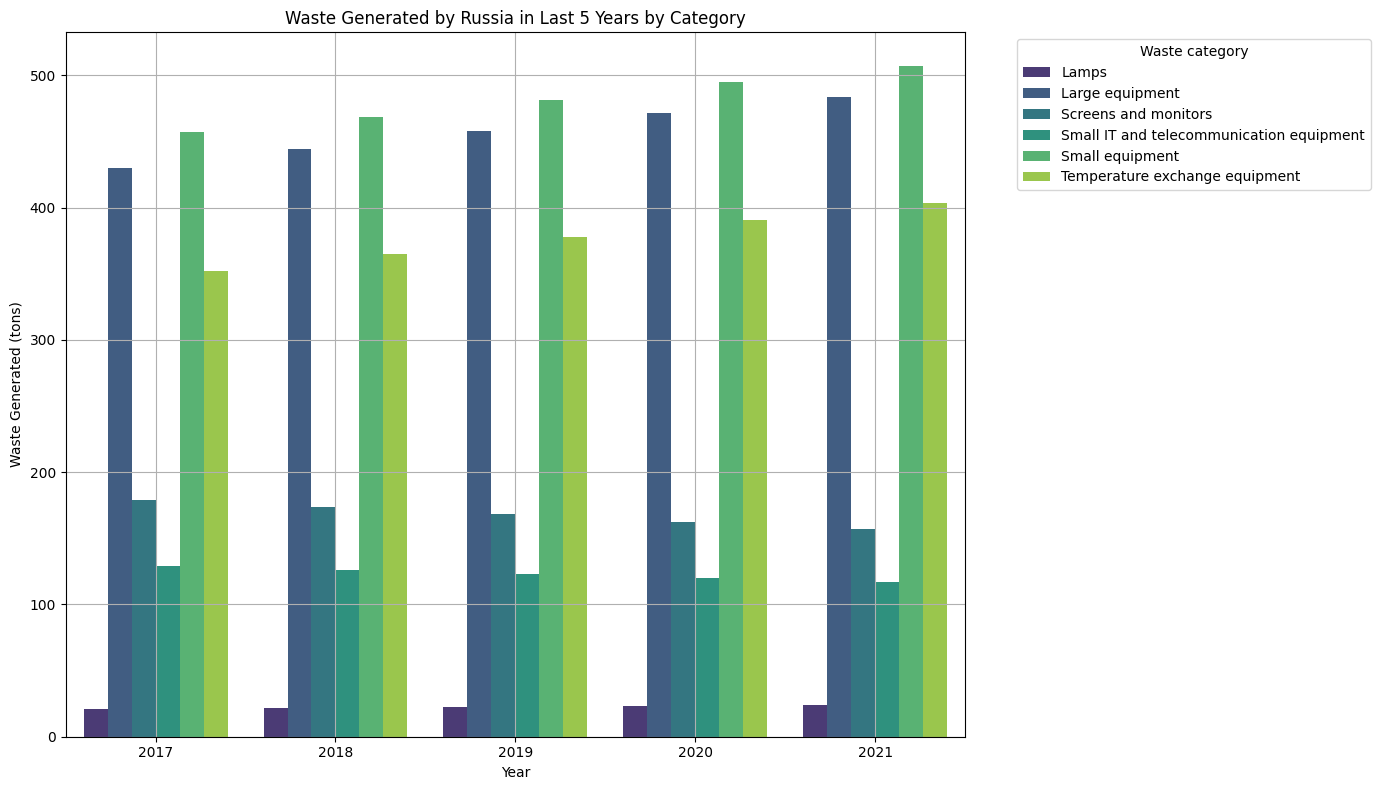

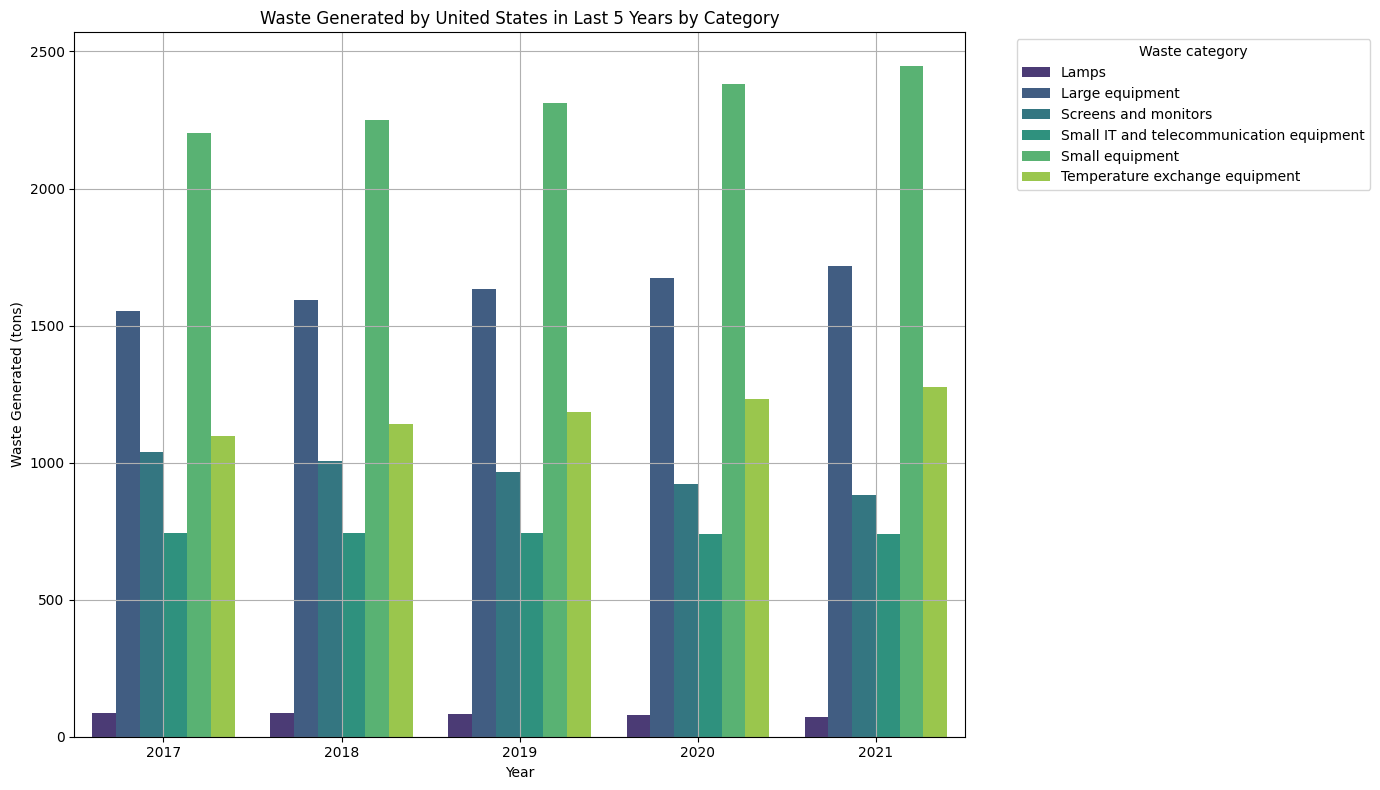

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/GlobalData.csv'  # Adjust this path as necessary
df = pd.read_csv(file_path)

# Filter the data for "Waste generated"
filtered_df = df[
    (df['Waste management operations'] == 'Waste generated') &
    (df['UNIT'] == 'TH_T') &
    (df['Country'].isin(['United States', 'Japan', 'Russia'])) &
    (df['Waste category'].isin(['Lamps', 'Large equipment', 'Screens and monitors',
       'Small IT and telecommunication equipment', 'Small equipment',
       'Temperature exchange equipment']))

]

# Filter for the last 5 years
last_5_years = filtered_df['TIME_PERIOD'].max() - 4
filtered_df = filtered_df[filtered_df['TIME_PERIOD'] >= last_5_years]

# Group by Country, Waste category, and Year and sum the observation values
grouped_df = filtered_df.groupby(['Country', 'Waste category', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()

countrys = grouped_df['Country'].unique()

for country in countrys:
    country_df = grouped_df[grouped_df['Country'] == country]

    plt.figure(figsize=(14, 8))
    sns.barplot(data=country_df, x='TIME_PERIOD', y='OBS_VALUE', hue='Waste category', palette='viridis')
    plt.title(f'Waste Generated by {country} in Last 5 Years by Category')
    plt.xlabel('Year')
    plt.ylabel('Waste Generated (tons)')
    plt.legend(title='Waste category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Average Waste Generated Per Capita by Country (in kg) for Last 5 Years

# Average Waste Generated per capita

Calculated the average waste generated per capita in all the countries.
1. India has the lowest per capita rate
2. Though USA is number 1 in total waste generated but average waste generated per capita is highest in UK.

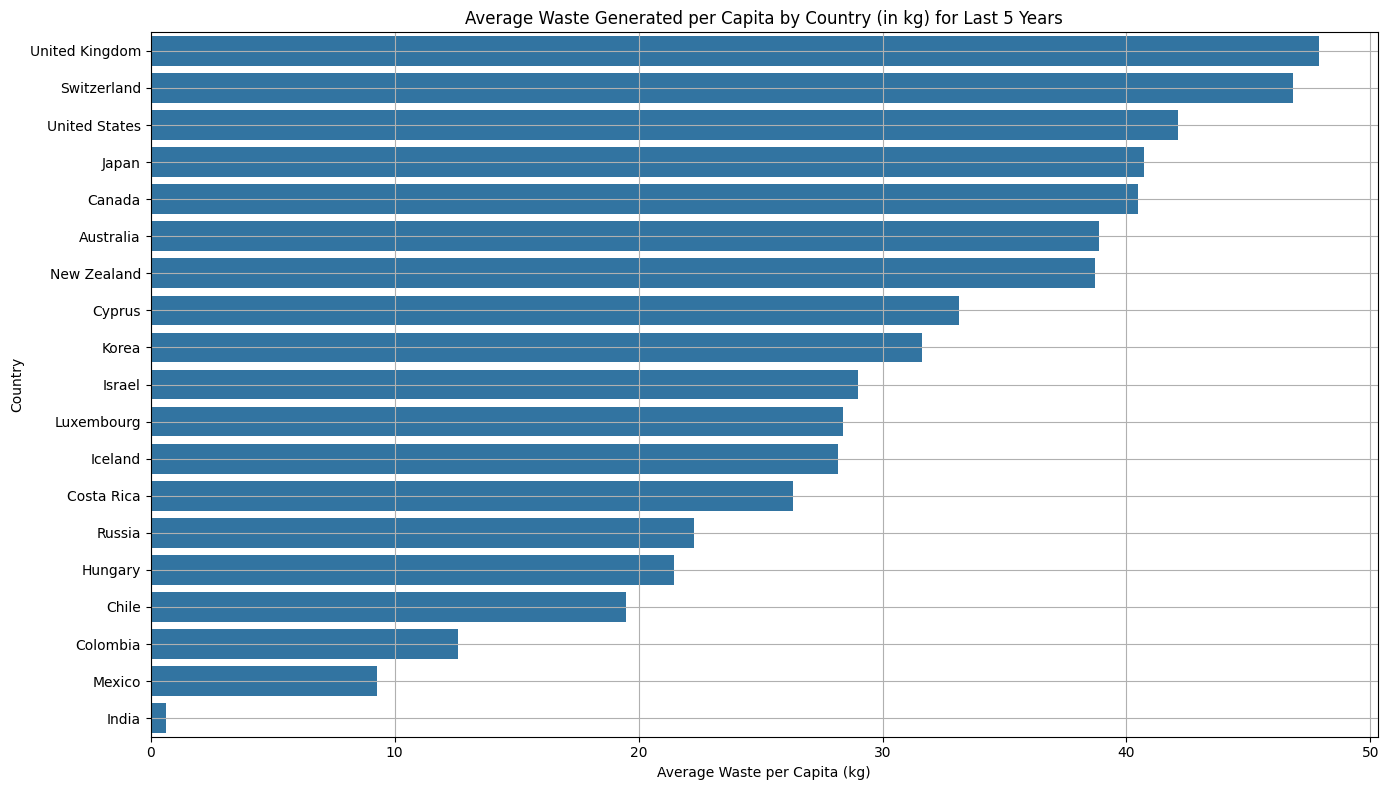

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/GlobalData.csv'  # Adjust this path as necessary
df = pd.read_csv(file_path)

# Filter the data for "Kilograms per capita"
filtered_df = df[(df['Unit of measure'] == 'Kilograms per capita') & (df['Waste management operations'] == 'Waste generated')]

# Filter for the last 5 years
last_5_years = filtered_df['TIME_PERIOD'].max() - 4
filtered_df = filtered_df[filtered_df['TIME_PERIOD'] >= last_5_years]

# Group by Country and Year and sum the observation values
grouped_df = filtered_df.groupby(['Country', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()

# Calculate the average waste per capita for the last 5 years
avg_waste_per_capita = grouped_df.groupby('Country')['OBS_VALUE'].mean().reset_index()
avg_waste_per_capita = avg_waste_per_capita.sort_values('OBS_VALUE', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_waste_per_capita, x='OBS_VALUE', y='Country')
plt.title('Average Waste Generated per Capita by Country (in kg) for Last 5 Years')
plt.xlabel('Average Waste per Capita (kg)')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the survey data
file_path = '/content/sample_data/GlobalData.csv'  # Adjust this path as necessary
df = pd.read_csv(file_path)

# Count the frequency of each response category for the awareness question
Category_waste = data[].value_counts()

# Create a pie chart for the awareness about e-waste disposal
plt.figure(figsize=(8, 8))
plt.pie(awareness_counts, labels=awareness_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=len(awareness_counts)))
plt.title('Awareness of the Environmental Impact of Improper E-Waste Disposal')
plt.show()


